In [1]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
plt.style.use('fivethirtyeight')

In [2]:
raw_tweets_df = pd.read_csv('..\\data\\Stream_202011050852.csv')

In [3]:
raw_tweets_df['full_text'].values

array(["Hunting For Your Dream by Galneryus fills with a youthful determination. It makes me want to try harder for my goals and to try things I always been too afraid to do. I wish I could have this feeling all the time and not just when I'm listening to music!",
       "idk I've been rly out of it and avoiding any kind of social existence lately, but fishing (mini)games are always some kinda peaceful to play... nature sounds and underwater ambience are *chefs kiss*",
       'News guy wept and told us,\nEarth was really dying\nCried so much his face was wet,\nThen I knew he was not lying.\n- David Bowie\n\nFrom JZ Ellis on FB \n\nhttps://t.co/yqz4WXUhE3',
       ...,
       'Well, we may as well laugh. Before we slit our wrists.\n\nA young man down on his luck was hitch-hiking through New England. A well-dressed man driving a Lincoln pulled up, lowered the passenger side window, and asked, “Do you vote Republican or Democrat?”',
       'The AAMC releases a plan “to rethink the nation’

In [4]:
raw_tweets_df

,coordinates,created_at,place,possibly_sensitive,full_text,id_str,name,screen_name,location,description
0,None,Mon Oct 26 06:28:40 +0000 2020,NaN,NaN,Hunting For Your Dream by Galneryus fills with...,2493496567,Sastgamer,sastgamer,The Internet,#StopBeingLazy2021
1,None,Mon Oct 26 06:28:42 +0000 2020,NaN,NaN,idk I've been rly out of it and avoiding any k...,950414253634224128,LynxNest Robby,RobanCrow,Canada,Hobby artist. Fantasy novelist. Casual gamer. ...
2,None,Mon Oct 26 06:28:43 +0000 2020,NaN,0.0,"News guy wept and told us,\nEarth was really d...",819202110,Jonathan's Daughter,thewifeoffloyd,I can see Te Mata Peak,It doesn't really matter if the glass is half ...
3,None,Mon Oct 26 06:28:44 +0000 2020,NaN,NaN,FISHING COMPLETE.... for now. yeehaw!\n\nTHANK...,1272142945534304256,marsy 🐭 vtuber,maroony__,i: @ika_kukomi┆h: @rinihimme,📚🌟 virtual librarian mouse ♡ ( ˙꒳​˙ )┆aspiring...
4,None,Mon Oct 26 06:28:48 +0000 2020,NaN,0.0,Chinese Landscape White Granite !Inquiry:xishi...,1065270425377157122,Granite&Marble Mike,GraniteMarbleM1,"Los Angeles, CA",Leading Natrual Stone Projects Contractor and ...
5,None,Mon Oct 26 06:28:49 +0000 2020,NaN,0.0,A real estate broker that caters to premium es...,1202799344593694720,Karl Tombstone,KarlTombstone,NaN,"Be cool, You only live once."
6,None,Mon Oct 26 06:29:00 +0000 2020,NaN,0.0,@MatthewJDalby Lind's original trial suggested...,1185606489395859457,Harmless Frog,FrogHarmless,NaN,Agriculture was a mistake. Catholic Carnivore.
7,None,Mon Oct 26 06:29:01 +0000 2020,NaN,0.0,What life is like where we live (Huntington Be...,2707584582,"""BOB"" 🇺🇸",Photos2Retweet,"Huntington Beach, CA",Welcome to my gallery of photos taken by world...
8,None,Mon Oct 26 06:29:03 +0000 2020,NaN,NaN,"@AndyKaruza @latimes No, but this highlights t...",161781738,NotoriousIANV 🏁🎃,NotoriousIanV,PNW ✈️,📤 Digital Growth/Cannabis/Hemp. Co Founder @ E...
9,None,Mon Oct 26 06:29:03 +0000 2020,NaN,0.0,ANTI-FOG CLEANING CLOTH #optical #ANTI-FOG\n\n...,1309123292859715591,Jessy Sweety,JessySweety3,NaN,I love Chelsea.


In [5]:
tweets_df = raw_tweets_df[['created_at', 'full_text']].reset_index()
tweets_df.head()

,index,created_at,full_text
0,0,Mon Oct 26 06:28:40 +0000 2020,Hunting For Your Dream by Galneryus fills with...
1,1,Mon Oct 26 06:28:42 +0000 2020,idk I've been rly out of it and avoiding any k...
2,2,Mon Oct 26 06:28:43 +0000 2020,"News guy wept and told us,\nEarth was really d..."
3,3,Mon Oct 26 06:28:44 +0000 2020,FISHING COMPLETE.... for now. yeehaw!\n\nTHANK...
4,4,Mon Oct 26 06:28:48 +0000 2020,Chinese Landscape White Granite !Inquiry:xishi...


In [6]:
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'])

In [7]:
tweets_df

,index,created_at,full_text
0,0,2020-10-26 06:28:40+00:00,Hunting For Your Dream by Galneryus fills with...
1,1,2020-10-26 06:28:42+00:00,idk I've been rly out of it and avoiding any k...
2,2,2020-10-26 06:28:43+00:00,"News guy wept and told us,\nEarth was really d..."
3,3,2020-10-26 06:28:44+00:00,FISHING COMPLETE.... for now. yeehaw!\n\nTHANK...
4,4,2020-10-26 06:28:48+00:00,Chinese Landscape White Granite !Inquiry:xishi...
5,5,2020-10-26 06:28:49+00:00,A real estate broker that caters to premium es...
6,6,2020-10-26 06:29:00+00:00,@MatthewJDalby Lind's original trial suggested...
7,7,2020-10-26 06:29:01+00:00,What life is like where we live (Huntington Be...
8,8,2020-10-26 06:29:03+00:00,"@AndyKaruza @latimes No, but this highlights t..."
9,9,2020-10-26 06:29:03+00:00,ANTI-FOG CLEANING CLOTH #optical #ANTI-FOG\n\n...


In [8]:
# Clean the text in the tweets
def cleantwt(txt):
    txt = re.sub(r'@[A-Z][a-z][0-9]+', '', txt)
    txt = re.sub(r'#', '', txt)
    txt = re.sub(r'https?:\/\/\S+', '', txt)
    txt = re.sub('[^#a-zA-Z0-9]',' ', txt)
    txt = re.sub('amp',' ', txt)
    return txt

In [9]:
# Remove stop words
stop = stopwords.words('english')
tweets_df["rm_stop"] = tweets_df["full_text"].str.lower().str.split()
tweets_df['rm_stop'] = tweets_df['rm_stop'].apply(lambda x: [item for item in x if item not in stop])

tweets_df.head()

,index,created_at,full_text,rm_stop
0,0,2020-10-26 06:28:40+00:00,Hunting For Your Dream by Galneryus fills with...,"[hunting, dream, galneryus, fills, youthful, d..."
1,1,2020-10-26 06:28:42+00:00,idk I've been rly out of it and avoiding any k...,"[idk, i've, rly, avoiding, kind, social, exist..."
2,2,2020-10-26 06:28:43+00:00,"News guy wept and told us,\nEarth was really d...","[news, guy, wept, told, us,, earth, really, dy..."
3,3,2020-10-26 06:28:44+00:00,FISHING COMPLETE.... for now. yeehaw!\n\nTHANK...,"[fishing, complete...., now., yeehaw!, thank, ..."
4,4,2020-10-26 06:28:48+00:00,Chinese Landscape White Granite !Inquiry:xishi...,"[chinese, landscape, white, granite, !inquiry:..."


In [10]:
tweets_df['rm_stop'] = tweets_df['rm_stop'].str.join(" ")
tweets_df

,index,created_at,full_text,rm_stop
0,0,2020-10-26 06:28:40+00:00,Hunting For Your Dream by Galneryus fills with...,hunting dream galneryus fills youthful determi...
1,1,2020-10-26 06:28:42+00:00,idk I've been rly out of it and avoiding any k...,idk i've rly avoiding kind social existence la...
2,2,2020-10-26 06:28:43+00:00,"News guy wept and told us,\nEarth was really d...","news guy wept told us, earth really dying crie..."
3,3,2020-10-26 06:28:44+00:00,FISHING COMPLETE.... for now. yeehaw!\n\nTHANK...,fishing complete.... now. yeehaw! thank u raid...
4,4,2020-10-26 06:28:48+00:00,Chinese Landscape White Granite !Inquiry:xishi...,chinese landscape white granite !inquiry:xishi...
5,5,2020-10-26 06:28:49+00:00,A real estate broker that caters to premium es...,real estate broker caters premium estates lake...
6,6,2020-10-26 06:29:00+00:00,@MatthewJDalby Lind's original trial suggested...,@matthewjdalby lind's original trial suggested...
7,7,2020-10-26 06:29:01+00:00,What life is like where we live (Huntington Be...,"life like live (huntington beach, ca). (before..."
8,8,2020-10-26 06:29:03+00:00,"@AndyKaruza @latimes No, but this highlights t...","@andykaruza @latimes no, highlights devastatin..."
9,9,2020-10-26 06:29:03+00:00,ANTI-FOG CLEANING CLOTH #optical #ANTI-FOG\n\n...,anti-fog cleaning cloth #optical #anti-fog app...


In [11]:
tweets_df['rm_stop'] = tweets_df['rm_stop'].apply(cleantwt)
tweets_df.head()

,index,created_at,full_text,rm_stop
0,0,2020-10-26 06:28:40+00:00,Hunting For Your Dream by Galneryus fills with...,hunting dream galneryus fills youthful determi...
1,1,2020-10-26 06:28:42+00:00,idk I've been rly out of it and avoiding any k...,idk i ve rly avoiding kind social existence la...
2,2,2020-10-26 06:28:43+00:00,"News guy wept and told us,\nEarth was really d...",news guy wept told us earth really dying crie...
3,3,2020-10-26 06:28:44+00:00,FISHING COMPLETE.... for now. yeehaw!\n\nTHANK...,fishing complete now yeehaw thank u raid...
4,4,2020-10-26 06:28:48+00:00,Chinese Landscape White Granite !Inquiry:xishi...,chinese landscape white granite inquiry xishi...


In [12]:
# Get subjectivity and polarity of tweets
def getsubj(txt):
    return TextBlob(txt).sentiment.subjectivity

def getpola(txt):
    return TextBlob(txt).sentiment.polarity

In [13]:
tweets_df['Subjectivity'] = tweets_df['rm_stop'].apply(getsubj)
tweets_df['Polarity'] = tweets_df['rm_stop'].apply(getpola)
tweets_df.head()

,index,created_at,full_text,rm_stop,Subjectivity,Polarity
0,0,2020-10-26 06:28:40+00:00,Hunting For Your Dream by Galneryus fills with...,hunting dream galneryus fills youthful determi...,0.450000,-0.350000
1,1,2020-10-26 06:28:42+00:00,idk I've been rly out of it and avoiding any k...,idk i ve rly avoiding kind social existence la...,0.516667,0.145833
2,2,2020-10-26 06:28:43+00:00,"News guy wept and told us,\nEarth was really d...",news guy wept told us earth really dying crie...,0.266667,0.100000
3,3,2020-10-26 06:28:44+00:00,FISHING COMPLETE.... for now. yeehaw!\n\nTHANK...,fishing complete now yeehaw thank u raid...,0.470000,0.310000
4,4,2020-10-26 06:28:48+00:00,Chinese Landscape White Granite !Inquiry:xishi...,chinese landscape white granite inquiry xishi...,0.000000,0.000000


In [54]:
# Visualize the most commonly used words
words = ' '.join([tweets for tweets in tweets_df['rm_stop']])
cloudpic = WordCloud(width=500, height=300, max_font_size=120).generate(words)

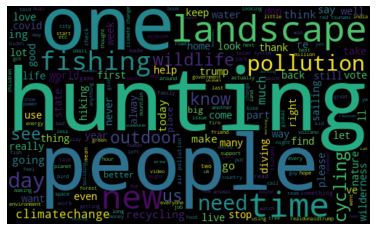

In [55]:
plt.imshow(cloudpic, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
def sentimentlabel(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [17]:
def sentimentlabel(score):
    if score < 0.3:
        return 'Negative'
    elif score == 0.3:
        return "Neutral"
    else:
        return "Positive"

In [29]:
tweets_df['sentiment'] = tweets_df['Polarity'].apply(sentimentlabel)
tweets_df.head().loc[0]['rm_stop']

'hunting dream galneryus fills youthful determination  makes want try harder goals try things always afraid do  wish could feeling time i m listening music '

In [30]:
# positive tweets
count=1
sortedpos = tweets_df.sort_values(by=['Polarity'])
for row in range(0, sortedpos.shape[0]):
    if(sortedpos['sentiment'][row] == 'Positive'):
        print(str(count) + '. ' + sortedpos['full_text'][row] + '\n')
        count += 1

1. idk I've been rly out of it and avoiding any kind of social existence lately, but fishing (mini)games are always some kinda peaceful to play... nature sounds and underwater ambience are *chefs kiss*

2. News guy wept and told us,
Earth was really dying
Cried so much his face was wet,
Then I knew he was not lying.
- David Bowie

From JZ Ellis on FB 

https://t.co/yqz4WXUhE3

3. FISHING COMPLETE.... for now. yeehaw!

THANK U FOR THE RAIDS @zRCloudy, @Charkkyy, and @Senniursa !!!! i ADORE you three so much!!! thank you for entrusting your lovely communities with me 🥺👉👈❤️

pls check them out they're all LOVELY and STELLAR &lt;3

4. A real estate broker that caters to premium estates of lakeside waterfront homes in Lake Kawarthas with boundless landscape and distinct community sense. 

#Kawarthalakescottagesforsale
#WaterfrontpropertyforsaleKawarthas 

https://t.co/PX4e1q0zMa https://t.co/RmP9dFJzHE

5. What life is like where we live (Huntington Beach, CA). (Before COVID-19 came to town


1051. I just love the colours in this photo!!

#nature #naturephotography #naturelovers #wildlife #wildlifephotography #rspb #rspb_love_nature #rspblovenature #mallard #mallardduck #birds #bird #birdphotography #birdlovers #ukbird #ukbirds #ukbirdwatching #bbcwildlife #bbcautumnwatch https://t.co/Lc8QuD3llU

1052. World Champion Tests Positive for Covid-19

The 28-year old Norwegian ski racer Aleksander Kilde is now self-isolating in Norway.

He won last season’s overall title.

He is said to be in a good condition. 

https://t.co/oIZO2wS1hk https://t.co/zEaK7tCwZh

1053. @glizzyall @Prof_Anxiety @michaelshe @SethTimmons8 @MondoCoolGuy @BillitoSlayer @CyberpunkGame it's up to them to decide what they are going to do with THEIR OWN TIME
playing video games , hiking or staring at the ceiling .. it's none of your business mr wise ass

1054. @dr_nerilie This looks amazing @dr_nerilie! Can you tell us a bit about the assessment? Always good to hear of inspiring, best practice approaches fo


2043. Saddle River approves third deer culling contract to control herd in borough https://t.co/ywCPlLEeDC via @northjersey Hunting in suburbia? is the deer hunt, in HIGHER income Saddle River, for the deer’s sake or sake of the homeowner so that the deer doesn’t destroy vegetation?

2044. @PDXJenni @SkinnerPm The situation in Portland feels like a trial run for a post-election action. When I showed my Dad the live footage, he was shocked at the difference in what was happening vs. what is in the news cycle. He's 83, mostly uses his computer for fishing reports, not news.

2045. So lucky to have Dra. Silveyra at UNC as a wonderful colleague in air pollution biology, but also to learn from her trajectory and experiences. Felicidades 🎉🎉🎉

2046. @dm_ghaziabad 
Concern related to CARBON CONTINENTAL FACTORY near lal kaun Nh24 .. creating lot of pollution..carbon particle are floating all around # health problems are happening #but government is not taking any steps..even the marbles of hou

2866. @benjcartlidge I can't offer many suggestions as I've the musical inclination of a spoon. But have you checked there aren't any local choirs/groups/quartets etc that meet locally outdoors? i imagine all musicians are in dire need of practice so someone has prob organised something.

2867. Cristiano got a red card because of diving ( even tho it was a clear penalty ) and because he just touched the referee as shown in the photo, he got suspended for 5 matches.. today Messi shot the ball straight at the ref and got yellow carded only. makes you think.. 🤔 https://t.co/Diy3BQdvWq

2868. Went kayaking for the first time in #austin today was perfect out 75 degrees and sunny! I think Josh and I are seriously considering on getting kayaks at some point. We’ve only kayaked twice in our life but both times we’ve had a blast and it’s a great arm workout 💪 #austintexas https://t.co/JpLe06LHJf

2869. @eshaLegal @UnpaidComintern Why a bald eagle in this? Bald eagles are opportunistic predators

3925. Business has an important role to play in #ClimateChange adaptation. @NBISA member company @TigerBrands shares their experience highlighting: “We prioritise mitigation &amp; adaptation equally” to reduce emissions &amp; build resilience. #JoinTheCountdown #NBIAdaptation #SANBIAdaptation

3926. A welcome and long overdue report but it is not just animals that are affected by bright lighting - there is a growing human cost which urgently needs addressing too. #lightpollution #nightsky https://t.co/Z9BzsawNs9

3927. @Lu_knit Pretty sure group sessions will be banned. They are possibly related to     health centres - but even outdoors its limited to 1- 1 plus pre-schoolers  .

3928. @JoeMar @T1LoL @LCK_Global Why does people just keepsaying they don’t have experience.When Faker started he had experience?Kkoma?Canna?People needs to realize you can’t just keep recycling the same coaches.
Fans are not team owners to decide what they have or not do, players have to be satisfied not fans



4796. @M_McCormackMP Don't blame the @Greens ! 
They didn't invent #climatechange 
Take a look around you because you'll see significant others taking it seriously.
#auspol #ClimateAction #fossilfuels #LNPfail 
https://t.co/gnYoUfkOYd

4797. nphic: How does air pollution affect pregnant women and their newborn babies?

Air pollution, both inside and outside the home, contributed to the deaths of about 500,000 newborns in 2019, the team reports in the State of Global Air 2020.

https://t.co/DBtm4JmVHP

4798. I know the world is on fire &amp;there is so much to be sad &amp;anxious about, but I just spent an hour giving my best friend a visual tour of Bologna via Google maps to help start with apartment hunting , I'm so happy that they will be here next year, it's akin to family moving here

4799. The day poc Americans stop diving everyone by race/ethnicity and by social class instead is when we will finally progress 🙏🏽 NEWSFLASH rich whitewashed privileged Asians, blacks and Latinos vot

In [31]:
# negative tweets
count=1
sortedneg = tweets_df.sort_values(by=['Polarity'], ascending=False)
for row in range(0, sortedneg.shape[0]):
    if(sortedneg['sentiment'][row] == 'Negative'):
        print(str(count) + '. ' + sortedneg['full_text'][row] + '\n')
        count += 1

1. Hunting For Your Dream by Galneryus fills with a youthful determination. It makes me want to try harder for my goals and to try things I always been too afraid to do. I wish I could have this feeling all the time and not just when I'm listening to music!

2. @MatthewJDalby Lind's original trial suggested this, too - one of the arms was given cider, and they were making slow recovery. No doubt a life of sailing required more (what with the hardtack-and-rum-based diet and poor living arrangements).

https://t.co/ltlHzs3I8Y

3. @AndyKaruza @latimes No, but this highlights the devastating effects of gutting environmental protections. DT is doing more damage to our 🌎 then most presidents (removing 100 existing rules.) Dumping pollution is great for his lobbyists, bad for 🇺🇸

4. @AITA_reddit NTA. 

Ducks are feral animals and don't belong in a "pet life". Also he can never give them what a life in the outdoors does and (at least here in germany) it's even illegal to capture &amp; keep wil

265. @tumisole @kgophane_ This people are protecting some prominent figures, they went hunting for a fall guy and now its backfiring. Lest this so-called suspects mysteriously die in jail cause it looks like their little lie is coming undone. Wow, what a criminal we have for a government.

266. And fishing... 

A considerable amount of cold water has gone into this lake since my last session

so it’s even more essential to move the solid bags around today 

in the hope I can pick up a carp 🤞 https://t.co/SFHes6pJEK

267. @royal_forestry Its an ECO SAVE TREES anouncement! 1000s of wildlife species destroyed.50% less rail passengers&amp;90% less on London trains.#stophs2 :DO ALL SIGN THESE PETITIONS (two are over 56.000) https;//petition.parliament.uk/petitions/3116… Plus These petitions https://t.co/M31aJy7Vio…

268. Processing of the recyclable fractions of the waste, i.e. paper, plastic and metal, for reuse as input materials for recycling will, in the medium to long term, improve san


684. Just another bend over for @AustralianLabor for the Liberals. Weak as piss @AlboMP caving as usual. Murdoch papers will still hate you and Green voters will still not vote for you.

685. Charlotte has been having Friday afternoon gatherings with a few friends - masked and outdoors as much as possible - and I told her we'll have to pull back from those and now my shirt is wet with her tears.

686. .@dimensional invested $1 billion into 8 companies destroying the Amazon and violating Indigenous rights. Their only commitment is to maximizing profit. 

It must adopt policies that protect Indigenous rights and end deforestation NOW!

#ComplicityInDestruction #AmazonCeaseFire https://t.co/ix3EykA0xw

687. @LauraHubka I won't DM you. I won't tell you that you are wrong. But I will quote scripture to you...Luke 3:4 “The voice of one crying in the wilderness". That's what you are. ...And you are right.

688. Hearing reports of Paul Gascoigne turning up to Jeremy Corbyn's house with some f


911. This should apply to all socially distancing sports like paragliding......please 🪂 but this is a start.
Petition: Open golf courses as it plays an integral part to the improvement of both physical and mental health https://t.co/CBGmKuihSt

912. @deegandeegan11 @LifeOfBOS @marktigheST Taxing cycling would discourage its use and more cyclists means less traffic, less reliance on public transport and less emissions in the atmosphere. More cyclists benefits everyone.

913. @PierreTherrie17 @MoveOn I've listed 3 books and an online Pulitzer Prize site that exposed the misinformation and propaganda campaign some fossil fuel industry players funded to defuse political will to address their climate pollution. Another two: https://t.co/tKqGkBiI7f
https://t.co/AkTRo1fFwA

914. No logic, zero. Just say you’re obsessed with J00n stans and go cos I don’t see you camping in Tae stans comments who are upset that Sweet Night paid dust too?!

915. for a few months when I was 25 I had a client who

1555. @LadyNellieS There's racist people sure but to say all police or america as a whole is racist is a bit of a stretch. Stop being your own oppressors. No one is out here hunting you down. Unless your son is in a gang or you live in a bad neighborhood besides that you got nothing to fear.

1556. @DineshDSouza God has literally sent a pandemic of epic BIBLICAL proportions to basically tell you Christians you picked the wrong leader! If you don’t hear his message now it is 4 (40 years?) years of wilderness for the USA! Wake up evangelicals. That nagging conscience is the Holy Spirit!

1557. @KylieJaneKremer @NanaJudie8484 RACIST JOE SENDS MANUFACTURING OVERSEAS TO CHINA... FORCED LABOR, EXTREME POLLUTION DUE TO NO EMITTIONS CONTROL...   1 PLANET. 1 OZONE LAYER.  CONNECT THE DOT'S 💵 BIDEN'S GREEN SCHEMES 💵 TRUMP PLANTS BILLION TREE'S BIDEN GETS BILLIONS FROM CHINA...

1558. @RSSxve There nothing called green firecrackers! And fire crackers don’t cause pollution! The pollution &amp; pol

1797. @wheatus @GabySterbenz Peacocks and peahens have been roaming the streets of Bangor, #NorthWales . Increased populations/wildlife activity during decreased human activity, possibly? xx

1798. Mens Long Earring Dagger/Hunting Knife. Men silver/bronze earring. Dangle Earring. One male earring. weapon. Idea Gift for Men For Guys. https://t.co/GvJE9K7McK через @Etsy

1799. @CawthornforNC   hunting parakeets? Are you getting ready to storm the beaches of Normandy? If you were really tough you would have enlisted.  Remember they will reject all assholes who say they’re Nazis!

1800. Why have India's #pollution control boards been reduced to the role of advisors, instead of being proactive regulators during the deepening #environmentalcrisis? Lack of tech expertise, workforce shortage, poor info are among the reasons, says a new study https://t.co/teGdOiD14A https://t.co/wy3BwQSYLZ

1801. still can't forget that person who said baekhyun and jaehyun sound the same i was listening to volc

In [32]:
tweets_df.loc[15]['full_text']

'@realDonaldTrump @OANN The majority of Americans only want you gone. Jail preferably. I’m proud of my native state for not caving under your idiotically nasty threats!'

In [33]:
tweets_df['date'] = tweets_df['created_at'].dt.date

In [23]:
tweets_df

,index,created_at,full_text,rm_stop,Subjectivity,Polarity,sentiment,date
0,0,2020-10-26 06:28:40+00:00,Hunting For Your Dream by Galneryus fills with...,hunting dream galneryus fills youthful determi...,0.450000,-0.350000,Negative,2020-10-26
1,1,2020-10-26 06:28:42+00:00,idk I've been rly out of it and avoiding any k...,idk i ve rly avoiding kind social existence la...,0.516667,0.145833,Negative,2020-10-26
2,2,2020-10-26 06:28:43+00:00,"News guy wept and told us,\nEarth was really d...",news guy wept told us earth really dying crie...,0.266667,0.100000,Negative,2020-10-26
3,3,2020-10-26 06:28:44+00:00,FISHING COMPLETE.... for now. yeehaw!\n\nTHANK...,fishing complete now yeehaw thank u raid...,0.470000,0.310000,Positive,2020-10-26
4,4,2020-10-26 06:28:48+00:00,Chinese Landscape White Granite !Inquiry:xishi...,chinese landscape white granite inquiry xishi...,0.000000,0.000000,Negative,2020-10-26
5,5,2020-10-26 06:28:49+00:00,A real estate broker that caters to premium es...,real estate broker caters premium estates lake...,0.433333,0.100000,Negative,2020-10-26
6,6,2020-10-26 06:29:00+00:00,@MatthewJDalby Lind's original trial suggested...,matthewjdalby lind s original trial suggested...,0.583333,-0.108333,Negative,2020-10-26
7,7,2020-10-26 06:29:01+00:00,What life is like where we live (Huntington Be...,life like live huntington beach ca before...,0.500000,0.136364,Negative,2020-10-26
8,8,2020-10-26 06:29:03+00:00,"@AndyKaruza @latimes No, but this highlights t...",andykaruza latimes no highlights devastatin...,0.805556,-0.300000,Negative,2020-10-26
9,9,2020-10-26 06:29:03+00:00,ANTI-FOG CLEANING CLOTH #optical #ANTI-FOG\n\n...,anti fog cleaning cloth optical anti fog appli...,0.520833,0.229167,Negative,2020-10-26


In [34]:
grouped = tweets_df.groupby(['date', 'sentiment']).size()

In [35]:
grouped

date        sentiment
2020-10-26  Negative     174
            Neutral      187
            Positive     398
2020-10-27  Negative     186
            Neutral      178
            Positive     502
2020-10-28  Negative     225
            Neutral      198
            Positive     529
2020-10-29  Negative     207
            Neutral      188
            Positive     548
2020-10-30  Negative     236
            Neutral      153
            Positive     511
2020-10-31  Negative     154
            Neutral      132
            Positive     408
2020-11-01  Negative     177
            Neutral      155
            Positive     407
2020-11-02  Negative     173
            Neutral      138
            Positive     434
2020-11-03  Negative     184
            Neutral      184
            Positive     561
2020-11-04  Negative     198
            Neutral      158
            Positive     558
2020-11-05  Negative     141
            Neutral      122
            Positive     406
dtype: int64

In [36]:
test = grouped.unstack(level=0)

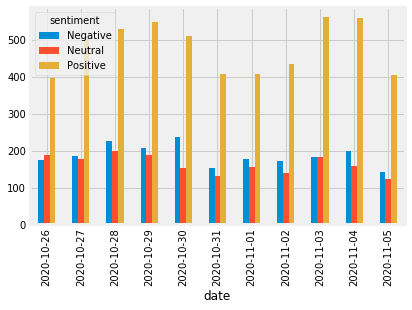

In [37]:
test.T.plot(kind='bar', subplots=False)

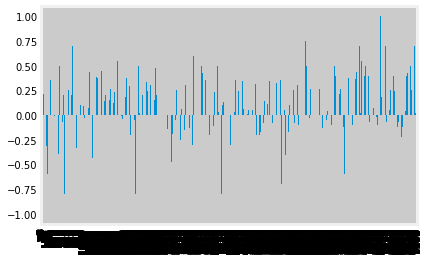

In [43]:
tweets_df['Polarity'].T.plot(kind='bar')

Text(0.5, 1.0, 'Polarity')

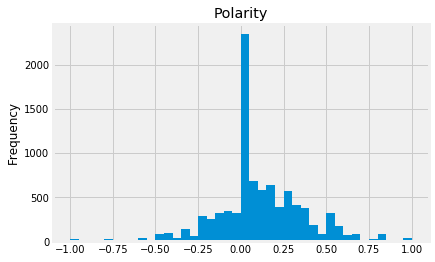

In [52]:
pol_ax = tweets_df['Polarity'].plot.hist(bins=40)
pol_ax.set_title("Polarity")

Text(0.5, 1.0, 'Subjectivity')

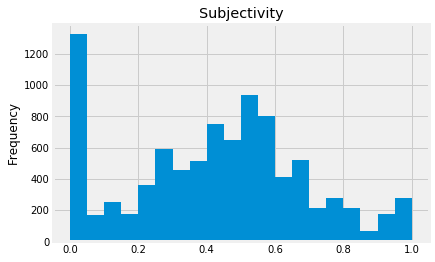

In [51]:
sub_ax = tweets_df['Subjectivity'].plot.hist(bins=20)
sub_ax.set_title("Subjectivity")

In [56]:
trump_df = tweets_df[tweets_df['full_text'].str.contains('trump')]

In [57]:
trump_df

,index,created_at,full_text,rm_stop,Subjectivity,Polarity,sentiment,date
423,423,2020-10-26 18:09:20+00:00,“Maybe teach your son a thing or two about lif...,maybe teach son thing two life like there s ...,0.700000,-0.100000,Negative,2020-10-26
441,441,2020-10-26 18:09:39+00:00,@Randi39632549 @Wejder11 @pumpactionmusk1 @Pro...,randi39632549 wejder11 pumpactionmusk1 pro...,0.700000,-0.300000,Negative,2020-10-26
600,600,2020-10-26 20:39:18+00:00,@Fabdi114 @celestitty @bradlaplante @dereckapu...,fabdi114 celestitty bradlaplante dereckapu...,0.407407,-0.101852,Negative,2020-10-26
803,803,2020-10-27 01:29:27+00:00,I would bet my ass they are not nuns.\nIf they...,would bet ass nuns are they re trump rally ...,0.500000,0.500000,Positive,2020-10-27
809,809,2020-10-27 01:39:16+00:00,@senatemajldr shame on you! Donald puppet. \nY...,senatemajldr shame you donald puppet consti...,0.333333,0.133333,Positive,2020-10-27
820,820,2020-10-27 01:49:26+00:00,@amvetsupport Why can’t ppl figure out that tr...,amvetsupport can t ppl figure trumpers thinks...,0.433333,-0.200000,Negative,2020-10-27
897,897,2020-10-27 04:29:12+00:00,"@dbongino @Sportsf42565586 I hear you Dan, I a...",dbongino sportsf42565586 hear dan old stomp...,0.200000,0.100000,Positive,2020-10-27
1356,1356,2020-10-27 14:29:38+00:00,umm so hey amy coney barret! when i said im bi...,umm hey amy coney barret said im bi meant bi ...,0.300000,0.250000,Positive,2020-10-27
1820,1820,2020-10-28 05:29:39+00:00,"oh ok,. for a second i thought it was \nif tru...",oh ok second thought trump win loot loot...,0.475000,0.450000,Positive,2020-10-28
2105,2105,2020-10-28 14:19:34+00:00,@HonoringRBG @RzstProgramming @MeidasTouch I f...,honoringrbg rzstprogramming meidastouch fir...,0.669643,0.044643,Positive,2020-10-28


Text(0.5, 1.0, 'Trump Subjectivity')

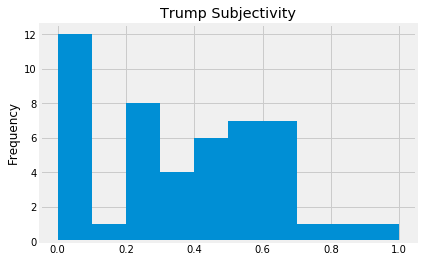

In [66]:
tsub= trump_df['Subjectivity'].plot.hist(bins=10)
tsub.set_title("Trump Subjectivity")

Text(0.5, 1.0, 'Trump Polarity')

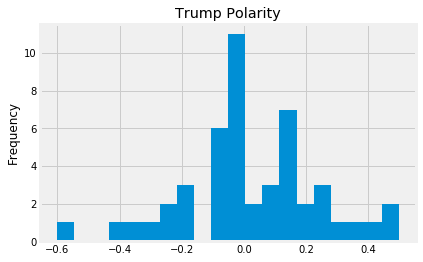

In [67]:
tpol = trump_df['Polarity'].plot.hist(bins=20)
tpol.set_title("Trump Polarity")

In [60]:
trump_df['sentiment'].value_counts()

Positive    22
Negative    16
Neutral     10
Name: sentiment, dtype: int64